# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Современные методы машинного обучения" </center>

# <center> Лабораторная работа №2. Детектирование букв. </center>

Вам дано два датасета: train.csv и test.csv. Каждая строчка в файлах - это одна картинка с буквой, в строчке 785 элементов, первый элемент - класс, все остальные - картинка 28х28:

In [1]:
import pandas as pd
train = pd.read_csv("train.csv", header=None)
test = pd.read_csv("test.csv", header=None)

In [2]:
import numpy as np
train = np.asarray(train)
test = np.asarray(test)
first_pic = train[8]
pic_label, pic = first_pic[0], first_pic[1:]
print(pic_label)

7


In [3]:
import matplotlib.pyplot as plt
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()

a, b, c, d, e, f, g - 7ая буква английского алфавита. 

## Задание

1) Создать модель нейронной сети, которая предсказывает букву по картинке. Модель обучать на данных из train.csv, качество модели проверять на данных из файла test.csv. Для построения модели желательно использовать библиотеки tensorflow и keras.
    1. Обязательно : построить модели с 2мя и 3мя скрытыми слоями, количество нейронов в слоях подобрать таким, какое вы считаете необходимым (по результатам обучения). 
    2. Объяснить выбор оптимальных параметров нейронной сети - количество и состав слоёв, нейронов на каждом слое, функций активации и других параметров. (3 балла за пункты 1-2)
    3. По желанию: попробовать другие возможные архитектуры (большее/меньшее количество слоёв, нейронов, свёрточные слои) с объяснением выбора и указанием получившихся результатов качества модели. Выбрать наилучшую модель. (1-2 балла)
2) Для наилучшей модели построить матрицу смежности (confusion_matrix) результатов предсказаний модели на тестовых данных (2 балла):
    1. Найти 10 пар букв, которые чаще всего путаются между собой - объяснить с логической точки зрения почему. Привести примеры с картинками, которые были детектированы с ошибкой.
    2. Насколько равномерно обучилась ваша модель, а именно все ли буквы определяются с примерно одинаковой точностью? Приведите доказательства вашей точки зрения, а также буквы с самым лучшим и с самым худшим процентом детекции (точностью детекции).
    3. Возьмите первую букву вашей фамилии и укажите её точность детекции. С какими буквами ваша модель чаще всего путает эту букву?
3) Оценка качества:
    - >0.85    +1 балл
    - >0.95    +2 балла
    - >0.99    +3 балла
4) Творческое задание (3 балла). Написать на листке белой бумаги (маркером или ручкой) от 5 разных букв (можно больше 5и букв в целом с повторениями, но должно быть 5 разных) английского алфавита (в датасете есть как прописные, так и строчные буквы). Сфотографировать букву и привести её картинку к размеру 28х28 и чёрно-белой палитре цветов. Сделать предсказание буквы вашей моделью. Получилось? :)
    - В датасете все буквы занимают практически всё пространство картинки по высоте или ширине (или вместе). Если ваша буква будет слишком маленькой или большой, это может повлиять на результат детекции.
    - Помните, что буква должна быть белого цвета, а фон - чёрного. Или другими словами, картинка должна в итоге представлять из себя 784 значения от 0 до 255 (целых) или от 0 до 1 (если вы приводите весь датасет к такому виду).
    - Также важно, что в исходном датасете все картинки транспонированы (см. 3 часть кода выше, 2ую строчку), а значит для корректной детекции надо транспонировать картинку, перед тем как делать функцию reshape. Либо надо перед обучением транспонировать все картинки, чтобы правильно посылать их на обучение.
    - Описание ваших действий по выполнению этого задания (что вы использовали чтобы привести картинку к нужному виду) полностью приветствуется преподавателями :)

In [106]:
train_labels = [x[0] for x in train]
train_images = [x[1:] for x in train]

test_labels = [x[0] for x in test]
test_images = [x[1:] for x in test]

train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

train_labels = train_labels - 1 # чтобы классы начинались с 0
test_labels = test_labels - 1

In [107]:
print('Train data size:', train_images.shape,
      '\nTest data size:', test_images.shape,
      '\n\nTrain label size:', train_labels.shape,
      '\nTest label size:', test_labels.shape)

Train data size: (65000, 784) 
Test data size: (13000, 784) 

Train label size: (65000,) 
Test label size: (13000,)


In [108]:
np.unique(train_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64),
 array([2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500], dtype=int64))

In [109]:
train_images = train_images / 255.0
test_images = test_images / 255.0

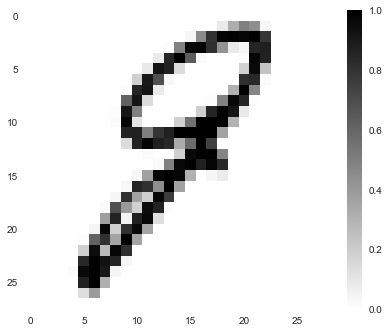

In [110]:
plt.figure()
plt.imshow(train_images[8].reshape((28, 28)).T, cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras

C:\Anaconda3\envs\minor_dl_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [111]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Flatten()) 

linear_model.add(keras.layers.Dense(100)) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Activation('relu')) # функция активации 

linear_model.add(keras.layers.Dense(26, activation=tf.nn.softmax))

linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [112]:
linear_model.fit(train_images, train_labels, epochs=10, verbose=0)
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 2s 151us/step
Test accuracy: 0.805 
Test loss: 0.6633692621451158


In [70]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Dense(100)) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Activation('relu')) # функция активации 

linear_model.add(keras.layers.Dense(50)) # скрытый слой из 50 нейронов
linear_model.add(keras.layers.Activation('relu')) # функция активации 

linear_model.add(keras.layers.Dense(26, activation=tf.nn.softmax))

linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [71]:
linear_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 1s 108us/step
Test accuracy: 0.8427692307692307 
Test loss: 0.5191994623037485


In [72]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Dense(200)) # скрытый слой из 200 нейронов
linear_model.add(keras.layers.Activation('relu')) # функция активации 

linear_model.add(keras.layers.Dense(100)) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Activation('relu')) # функция активации

linear_model.add(keras.layers.Dense(50)) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Activation('relu')) # функция активации 

linear_model.add(keras.layers.Dense(26, activation=tf.nn.softmax))

linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [73]:
linear_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 3s 209us/step
Test accuracy: 0.8613076923076923 
Test loss: 0.43963482763217043


# Модель с инициализацие параметров

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import initializers

In [27]:
ann_model = Sequential(
    [
        #Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100, activation='relu', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros'),  # скрытый слой из 100 нейронов
        Dense(26, activation='softmax', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [28]:
%%time
ann_model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

Epoch 1/10
65000/65000 [==============================] - 20s 305us/step - loss: 1.7958 - acc: 0.51890s - loss: 1.8146 -
Epoch 2/10
65000/65000 [==============================] - 21s 321us/step - loss: 1.1623 - acc: 0.6669
Epoch 3/10
65000/65000 [==============================] - 19s 300us/step - loss: 1.0247 - acc: 0.7090A: 0s - loss: 1.0259 - acc: 0.
Epoch 4/10
65000/65000 [==============================] - 15s 226us/step - loss: 0.9298 - acc: 0.73692s - loss: 0.9386 - acc:
Epoch 5/10
65000/65000 [==============================] - 15s 225us/step - loss: 0.8536 - acc: 0.7591
Epoch 6/10
65000/65000 [==============================] - 13s 204us/step - loss: 0.7912 - acc: 0.7767
Epoch 7/10
65000/65000 [==============================] - 17s 264us/step - loss: 0.7400 - acc: 0.7907
Epoch 8/10
65000/65000 [==============================] - 14s 222us/step - loss: 0.6967 - acc: 0.8025
Epoch 9/10
65000/65000 [==============================] - 15s 230us/step - loss: 0.6607 - acc: 0.8125
Epoch 10/

Инициализация весов никак не улучшила качество модели и функцию потерь.

# С использованием BatchNormalization и Regularization

In [11]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras import regularizers

In [30]:
ann_model = Sequential(
    [
        #Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        Dense(26, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [31]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 2s 186us/step

Test accuracy: 0.8265384615384616 
Test loss: 0.5832673985407902 

Wall time: 2min 45s


In [38]:
ann_model = Sequential(
    [
        Dense(100, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(50, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(26, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [39]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 2s 156us/step

Test accuracy: 0.8502307692307692 
Test loss: 0.49503416362175573 

Wall time: 2min 32s


# С использованием оптимизаторов Adam и RMSprop

In [114]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Dropout

In [41]:
ann_model = Sequential(
    [        
        Dense(100),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(50),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(26, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=Adam(lr=0.001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [42]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 2s 185us/step

Test accuracy: 0.8695384615384616 
Test loss: 0.4269357954263687 

Wall time: 3min 40s


In [47]:
ann_model = Sequential(
    [        
        Dense(100, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(75, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(50, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(75, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(26, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=Adam(lr=0.001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [49]:
%%time
ann_model.fit(train_images, train_labels, epochs=30, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 3s 251us/step

Test accuracy: 0.8825384615384615 
Test loss: 0.5311803894409767 

Wall time: 20min 53s


Модель с 4 скрытыми слоями с данным кол-вом нейронов достаточно долго обучается, при этом прирост качества незначителен. Функция потерь даже больше

In [66]:
ann_model = Sequential(
    [ 
        Dense(200, kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(100, kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(50, kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(26, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=RMSprop(lr=0.001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [67]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 3s 239us/step

Test accuracy: 0.8866923076923077 
Test loss: 0.48709354952665473 

Wall time: 5min 16s


In [115]:
ann_model = Sequential(
    [ 
        Dense(400, kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(200, kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.5),
        
        Dense(70, kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(26, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=Adam(lr=0.001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [116]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 6s 443us/step

Test accuracy: 0.9038461538461539 
Test loss: 0.3744867263848965 

Wall time: 12min 27s


Оптимальные параметры - 3 скрытых слоя по 400,200 и 70 нейронов, оптимизатор-Adam. Модель с этими параметрами показала наилучшее 
качество - 0.903, а также минимальные потери - 0.37.

# confusion_matrix

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
from plot_cm import plot_confusion_matrix
from matplotlib import style
style.use('seaborn')

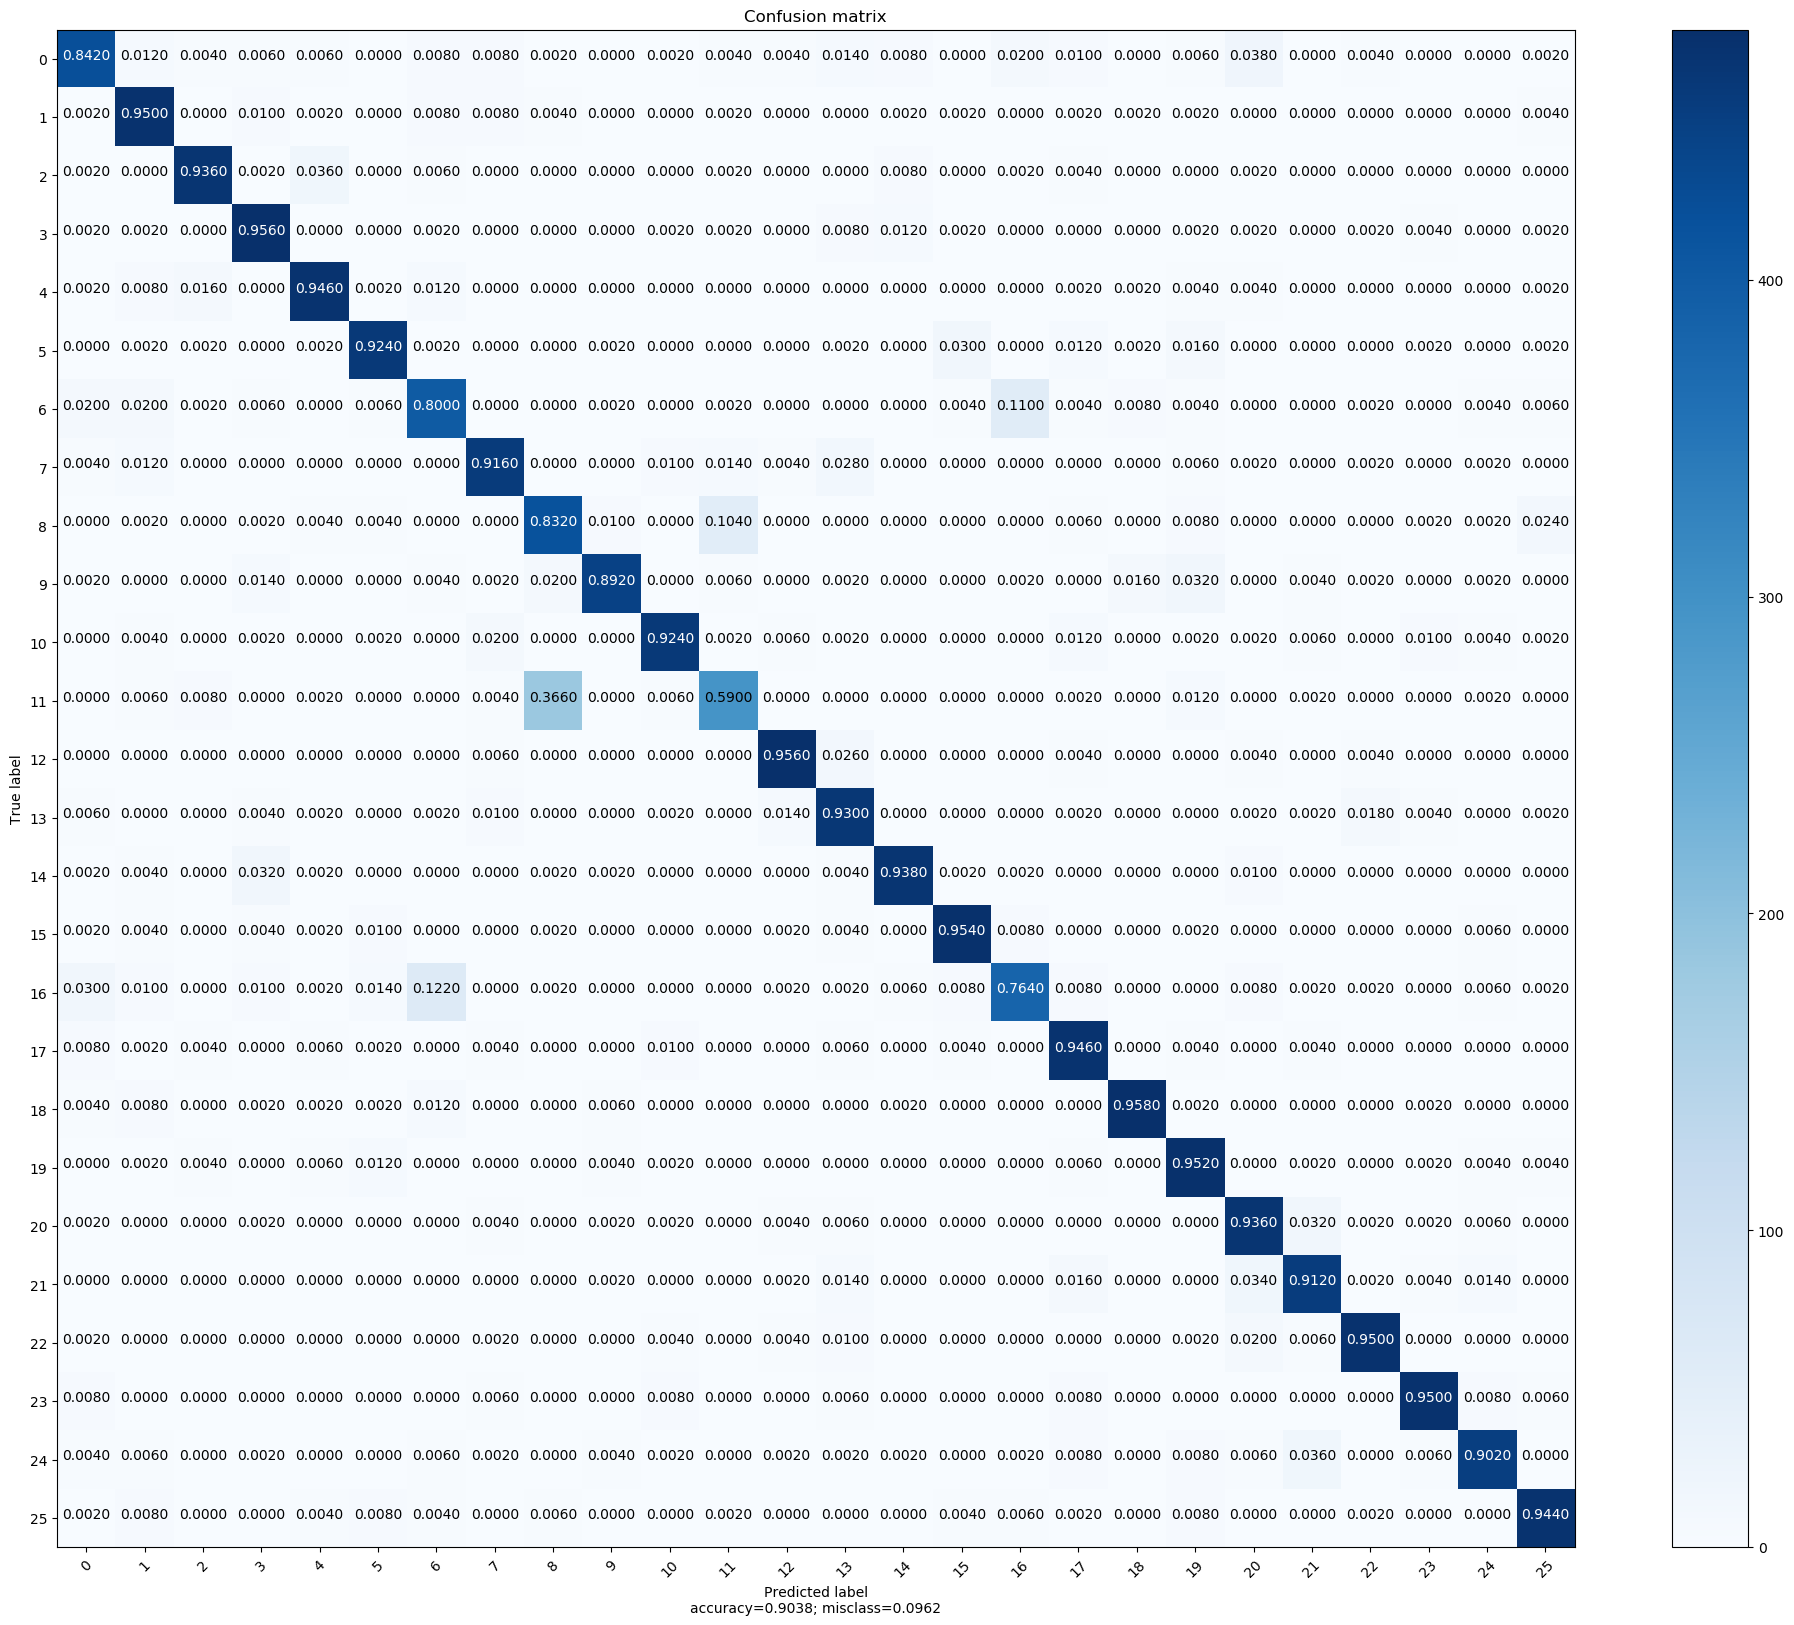

In [117]:
style.use('default')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, ann_model.predict_classes(test_images)),
                      target_names=np.arange(0, 26),
                      normalize=True)

часто путаются: A-U, E-C, F-P, G-Q, H-N, J-T, D-O, I-L, I-Z, M-N, U-V, V-Y


Модель путает эти буквы, потому что: 
U-V, V-Y состоят как бы из 2х элементов расширяющихся кверху;
M-N, H-N состоят из двух палок, но соединенных разными наклонными линиями;
I-L, J-T, F-P очень похожи, только элементы сверху или внизу различаются; 
I-Z различются только одним элем.(прямая);
D-O, G-Q (g-q), E-C (e-c) буквы имеют похожие полуокружности или окружности.

In [118]:
mistakes = ann_model.predict_classes(test_images) - test_labels
mistakes = np.asarray(mistakes)

In [119]:
mis_index = []
for i in range(0, len(mistakes)):
    if mistakes[i] != 0:
        mis_index.append(i)

In [120]:
len(mis_index)  # кол-во неправильно опознанных букв

1250

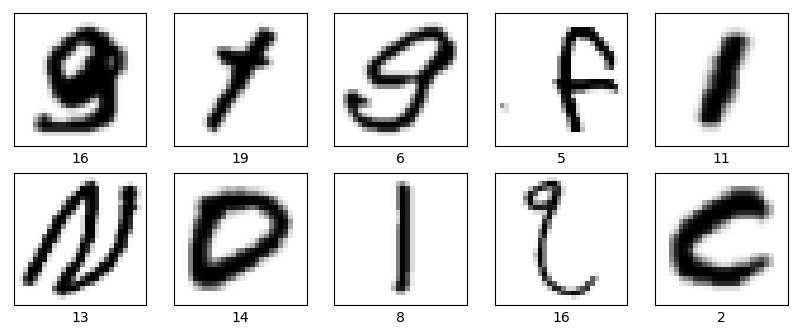

In [121]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[mis_index[i]].reshape(28,28).T, cmap=plt.cm.binary)
    plt.xlabel(test_labels[mis_index[i]])
    plt.grid(False)

plt.show()

Первые 10 примеров, которые были неправильно опознаны.

In [122]:
print(classification_report(test_labels, ann_model.predict_classes(test_images)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       500
           1       0.89      0.95      0.92       500
           2       0.96      0.94      0.95       500
           3       0.91      0.96      0.93       500
           4       0.92      0.95      0.93       500
           5       0.94      0.92      0.93       500
           6       0.81      0.80      0.80       500
           7       0.92      0.92      0.92       500
           8       0.67      0.83      0.74       500
           9       0.96      0.89      0.93       500
          10       0.95      0.92      0.94       500
          11       0.81      0.59      0.68       500
          12       0.96      0.96      0.96       500
          13       0.87      0.93      0.90       500
          14       0.96      0.94      0.95       500
          15       0.94      0.95      0.95       500
          16       0.83      0.76      0.80       500
          17       0.90    

Буквы с худшим процентом детекции - G,g(0.81), I,i(0.67), L,l(0.81), Q,q(0.83) - скорей всего потому, что модель часто путает эти буквы с другимим.

Первая буква фамилии - S, определяется с вероятностью 0.96-0.97, чаще всего путается с буквой G,g

# Задание 4

Я нарисовал 5 букв в Paint, перевел их в размер 28*28, и с помощью imread получил массив значений для каждой картинки.

In [14]:
from matplotlib.pyplot import imread

In [124]:
img=[]
img.append(imread('x1.png'))
img.append(imread('f.png'))
img.append(imread('R.png'))
img.append(imread('o.png'))
img.append(imread('s.png'))

In [125]:
img[0].shape

(28, 28, 4)

imread получает для каждого пикселя значение RGBA, поскольку изображение у нас черно-белое - то значения R,G, и B - одинаковые.

In [126]:
my_images = [[] for i in range(5)]
k=0
for x in img:
    for i in range(0, 28):
        for j in range(0, 28):
            my_images[k].append(x[i][j][0])
    k+=1

In [127]:
my_images = np.asarray(my_images)
my_labels = [23, 5, 17, 14, 18]
my_labels = np.asarray(my_labels)

Для каждой буквы получили массив 784 значений от 0 до 1

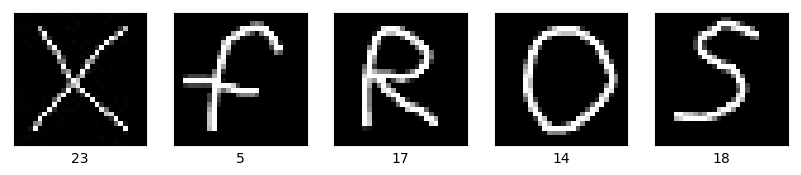

In [128]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(my_images[i].reshape(28,28), cmap='gray')
    plt.xlabel(my_labels[i])
    plt.grid(False)

plt.show()

In [129]:
my_loss, my_acc = ann_model.evaluate(my_images, my_labels)
print('\nMy accuracy:', my_acc, '\nMy loss:', my_loss, '\n')

5/5 [==============================] - 0s 3ms/step

My accuracy: 0.4000000059604645 
My loss: 5.231512546539307 



In [130]:
ann_model.predict_classes(my_images)

array([23,  9, 23, 14, 13], dtype=int64)

In [131]:
my_labels

array([23,  5, 17, 14, 18])

Модель определила только 2 буквы из 5 (x, o), f определила как j (нижняя половина букв похожа), R как X (так же), s как n.